In [1]:
# for Mathematical and Dataframe Operations
import numpy as np
import pandas as pd
# for Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.express as px
#for pre-processing & splitting data
from sklearn.preprocessing import StandardScaler, MinMaxScaler # values 0 to 1
from sklearn.model_selection import train_test_split, KFold , cross_val_score


In [2]:
# for datasets and visualizations
!pip install plotly-express  

In [3]:
import plotly.express as px

loading the two datasets into two different dataframes

In [4]:
airbnb_df = pd.read_csv('Airbnb Dataset 19.csv') #reading the csv file
airbnb_df

id                                              name  host_id  \
0     2539                Clean & quiet apt home by the park     2787   
1     2595                             Skylit Midtown Castle     2845   
2     3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3     3831                   Cozy Entire Floor of Brownstone     4869   
4     5022  Entire Apt: Spacious Studio/Loft by central park     7192   
..     ...                                               ...      ...   
244  61492          Exclusive Room with Private Bath in  LES   297769   
245  61509               Quiet, clean midtown apt w. elevato    23619   
246  62095                 BK Sweet Suite w/Kitchen&FullBath   281764   
247  62427               Great East Village Apartment Rental   303882   
248  62430                     BROWNSTONE SUNDRENCHED BEAUTY   197755   

        host_name neighbourhood_group  neighbourhood  latitude  longitude  \
0            John            Brooklyn     Kensington  40.64749  -73.97237   
1        Jennifer           Manhattan        Midtown  40.75362  -73.98377   
2       Elisabeth           Manhattan         Harlem  40.80902  -73.94190   
3     LisaRoxanne            Brooklyn   Clinton Hill  40.68514  -73.95976   
4           Laura           Manhattan    East Harlem  40.79851  -73.94399   
..            ...                 ...            ...       ...        ...   
244         Tunji           Manhattan      Chinatown  40.71445  -73.99080   
245    Anna/Fonzy           Manhattan        Midtown  40.75749  -73.96897   
246  Colette&Sean            Brooklyn  East Flatbush  40.64446  -73.95030   
247          Brie           Manhattan   East Village  40.72680  -73.99079   
248        Sheila            Brooklyn       Bushwick  40.68800  -73.91710   

           room_type  price  minimum_nights  number_of_reviews last_review  \
0       Private room    149               1                  9  10/19/2018   
1    Entire home/apt    225               1                 45   5/21/2019   
2       Private room    150               3                  0         NaN   
3    Entire home/apt     89               1                270    7/5/2019   
4    Entire home/apt     80              10                  9  11/19/2018   
..               ...    ...             ...                ...         ...   
244     Private room    120               4                171   6/23/2019   
245  Entire home/apt    110             200                 92   4/30/2019   
246  Entire home/apt     65               3                238   6/14/2019   
247  Entire home/apt    130              50                 56   5/26/2019   
248  Entire home/apt     99               3                111   6/22/2019   

     reviews_per_month  calculated_host_listings_count  availability_365  
0                 0.21                               6               365  
1                 0.38                               2               355  
2                  NaN                               1               365  
3                 4.64                               1               194  
4                 0.10                               1                 0  
..                 ...                             ...               ...  
244               1.80                               2               353  
245               0.90                               1               140  
246               2.30                               1                 2  
247               0.58                               1                56  
248               2.13                               1                68  

[249 rows x 16 columns]

In [5]:
hr_df = pd.read_csv('HRDataset_v14.csv') #reading the csv file
hr_df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0              1       5            4                       0   62506  ...   
1              5       3            3                       0  104437  ...   
2              5       5            3                       0   64955  ...   
3              1       5            3                       0   64991  ...   
4              5       5            3                       0   50825  ...   
..           ...     ...          ...                     ...     ...  ...   
306            1       5            3                       0   65893  ...   
307            5       5            1                       0   48513  ...   
308            1       3            4                       0  220450  ...   
309            1       3            3                       0   89292  ...   
310            1       5            3                       0   45046  ...   

        ManagerName  ManagerID  RecruitmentSource PerformanceScore  \
0    Michael Albert       22.0           LinkedIn          Exceeds   
1        Simon Roup        4.0             Indeed      Fully Meets   
2    Kissy Sullivan       20.0           LinkedIn      Fully Meets   
3      Elijiah Gray       16.0             Indeed      Fully Meets   
4    Webster Butler       39.0      Google Search      Fully Meets   
..              ...        ...                ...              ...   
306  Kissy Sullivan       20.0           LinkedIn      Fully Meets   
307  Brannon Miller       12.0      Google Search              PIP   
308      Janet King        2.0  Employee Referral          Exceeds   
309      Simon Roup        4.0  Employee Referral      Fully Meets   
310   David Stanley       14.0           LinkedIn      Fully Meets   

     EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0                4.60               5                    0   
1                4.96               3                    6   
2                3.02               3                    0   
3                4.84               5                    0   
4                5.00               4                    0   
..                ...             ...                  ...   
306              4.07               4                    0   
307              3.20               2                    0   
308              4.60               5                    6   
309              5.00               3                    5   
310              4.50               5                    0   

    LastPerformanceReview_Date DaysLateLast30 Absences  
0                    1/17/2019              0        1  
1                    2/24/2016              0       17  
2                    5/15/2012              0        3  
3                     1/3/2019              0       15  
4                     2/1/2016              0        2  
..                         ...            ...      ...  
306                  2/28/2019              0       13  
307                   9/2/2015              5        4  
308                  2/21/2019             

data analysis of airbnb_df

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

In [7]:
airbnb_df.isnull().sum() # looks like only column last_review & reviews_per_month has null values

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

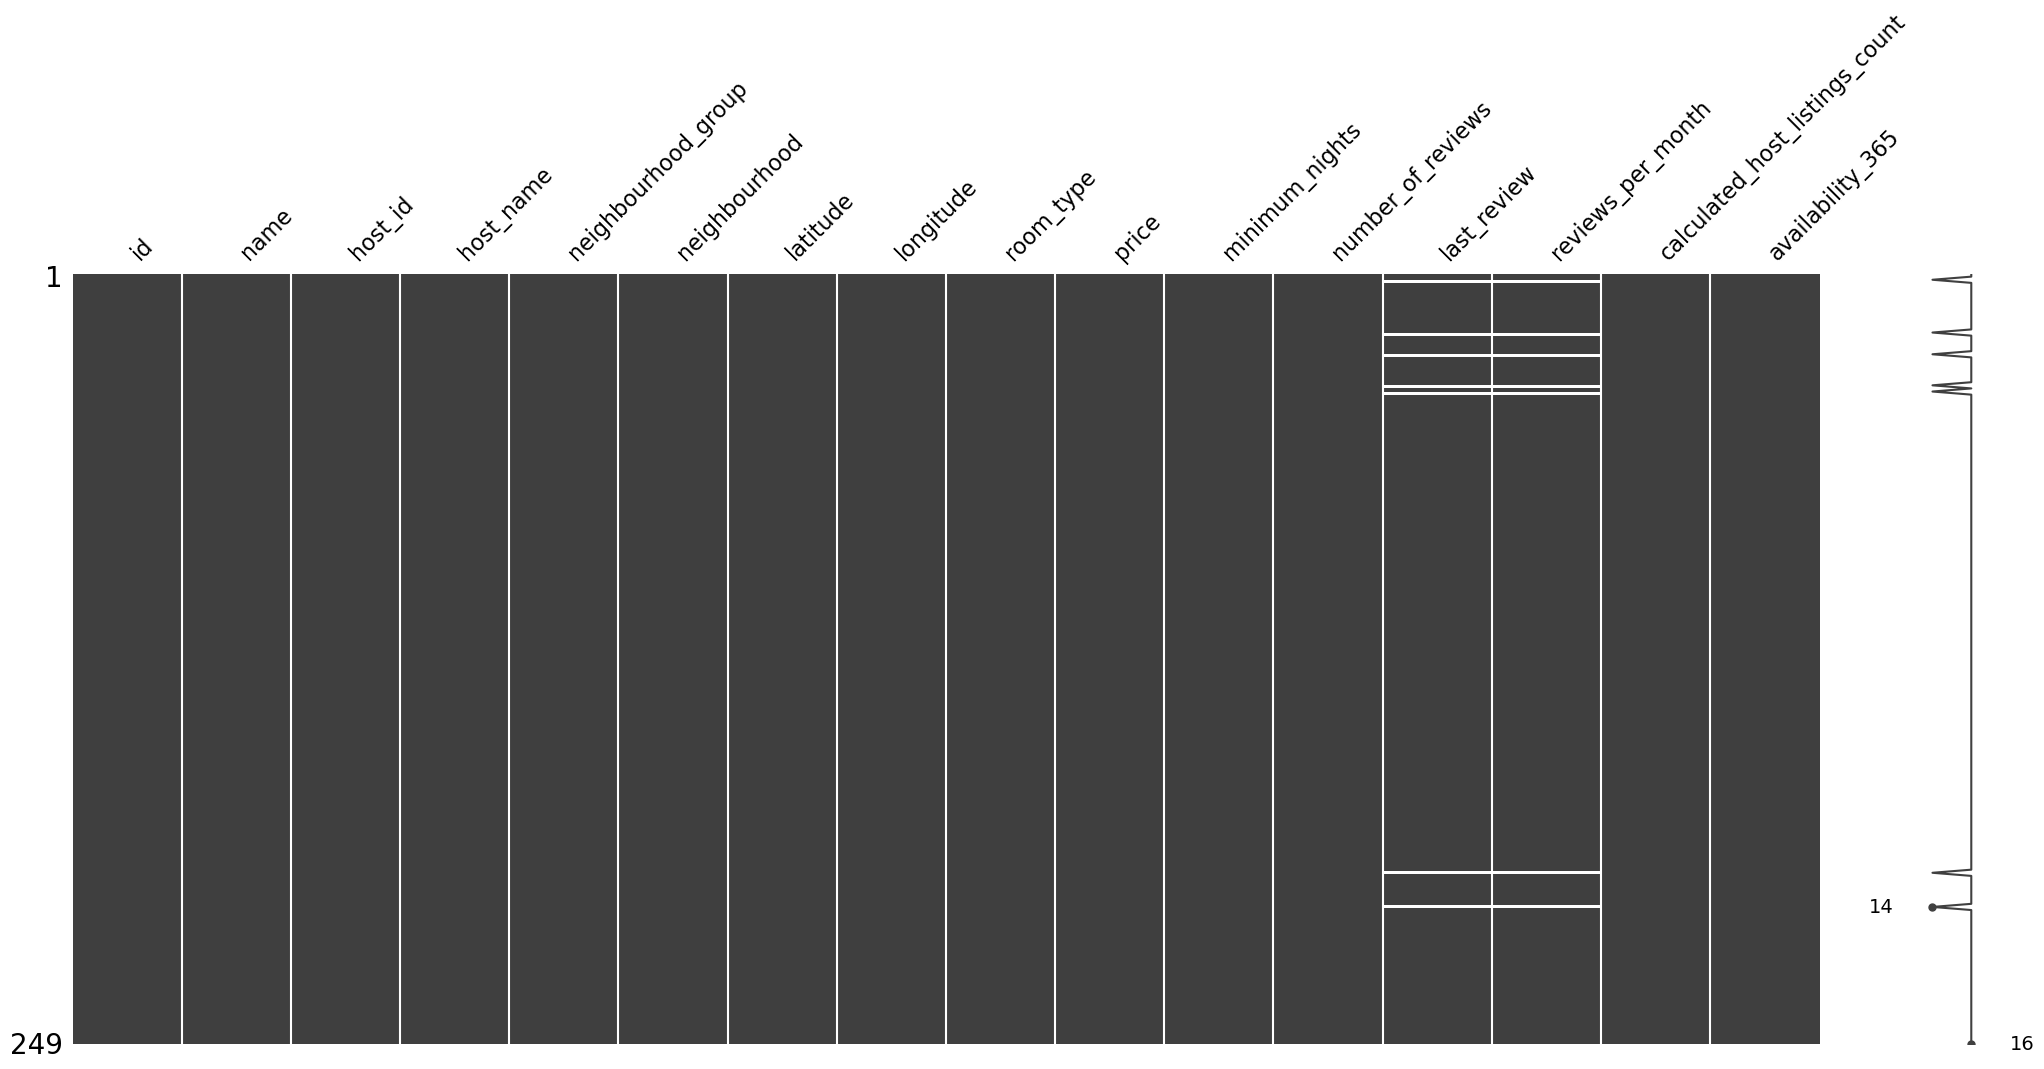

In [8]:
# lets visualize the missing values
import missingno as msno
msno.matrix(airbnb_df)#missingness matr
plt.show() #to show the plot
# looks like the row with missing last_review also has mising value in reviews_per_month

In [9]:
#Isolate missing and complete values aside.
missing=airbnb_df[airbnb_df['reviews_per_month'].isna()]
complete= airbnb_df[~airbnb_df['reviews_per_month'].isna()]

In [10]:
complete.describe()

id       host_id    latitude   longitude       price  \
count    242.000000  2.420000e+02  242.000000  242.000000  242.000000   
mean   31667.024793  1.518822e+05   40.729170  -73.964527  144.272727   
std    17953.882898  4.062905e+05    0.048392    0.029916   92.279028   
min     2539.000000  2.787000e+03   40.631880  -74.080880   40.000000   
25%    16430.250000  5.136225e+04   40.688108  -73.985222   85.000000   
50%    28651.500000  1.023750e+05   40.720280  -73.965835  125.000000   
75%    46864.000000  1.935678e+05   40.759568  -73.948373  175.000000   
max    62430.000000  6.197784e+06   40.864820  -73.765970  800.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count      242.000000         242.000000         242.000000   
mean         8.479339         106.438017           1.091653   
std         20.365172         100.201324           1.000168   
min          1.000000           1.000000           0.010000   
25%          2.000000          24.250000           0.280000   
50%          3.000000          79.500000           0.795000   
75%          5.000000         167.000000           1.650000   
max        200.000000         467.000000           4.720000   

       calculated_host_listings_count  availability_365  
count                      242.000000        242.000000  
mean                         1.752066        197.219008  
std                          1.247610        124.700661  
min                          1.000000          0.000000  
25%                          1.000000         75.000000  
50%                          1.000000        224.000000  
75%                          2.000000        307.000000  
max                          6.000000        365.000000

In [11]:
missing.describe()
# from here we can understand the reason why there is no last_review & reviews_per_month values is beacuse 
#the person nerver gave reviews

id        host_id   latitude  longitude       price  \
count      7.000000       7.000000   7.000000   7.000000    7.000000   
mean   21342.285714   84516.714286  40.767837 -73.947346  133.571429   
std    21782.246385  110497.530474   0.078597   0.011826   58.787349   
min     3647.000000    4632.000000  40.637020 -73.963270   35.000000   
25%     8225.000000   12670.000000  40.731045 -73.954010  105.000000   
50%    11452.000000   26394.000000  40.796850 -73.948720  150.000000   
75%    31690.500000  140933.000000  40.805680 -73.942510  170.000000   
max    54466.000000  253385.000000  40.867540 -73.926390  200.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count        7.000000                7.0                0.0   
mean        17.000000                0.0                NaN   
std         21.400935                0.0                NaN   
min          1.000000                0.0                NaN   
25%          3.500000                0.0                NaN   
50%          7.000000                0.0                NaN   
75%         22.000000                0.0                NaN   
max         60.000000                0.0                NaN   

       calculated_host_listings_count  availability_365  
count                        7.000000          7.000000  
mean                         1.285714        244.142857  
std                          0.487950        172.075980  
min                          1.000000          0.000000  
25%                          1.000000        124.500000  
50%                          1.000000        365.000000  
75%                          1.500000        365.000000  
max                          2.000000        365.000000

In [12]:
missing

id                                               name  host_id  \
2     3647                THE VILLAGE OF HARLEM....NEW YORK !     4632   
19    7750                  Huge 2 BR Upper East  Cental Park    17985   
26    8700  Magnifique Suite au N de Manhattan - vue Cloitres    26394   
36   11452                        Clean and Quiet in Brooklyn     7355   
38   11943                          Country space in the city    45445   
193  51438                1 Bedroom in 2 Bdrm Apt- Upper East   236421   
204  54466                Beautiful Uptown Manhattan apartmnt   253385   

           host_name neighbourhood_group       neighbourhood  latitude  \
2          Elisabeth           Manhattan              Harlem  40.80902   
19              Sing           Manhattan         East Harlem  40.79685   
26   Claude & Sophie           Manhattan              Inwood  40.86754   
36                Vt            Brooklyn  Bedford-Stuyvesant  40.68876   
38           Harriet            Brooklyn            Flatbush  40.63702   
193          Jessica           Manhattan     Upper East Side  40.77333   
204          Douglas           Manhattan              Harlem  40.80234   

     longitude        room_type  price  minimum_nights  number_of_reviews  \
2    -73.94190     Private room    150               3                  0   
19   -73.94872  Entire home/apt    190               7                  0   
26   -73.92639     Private room     80               4                  0   
36   -73.94312     Private room     35              60                  0   
38   -73.96327     Private room    150               1                  0   
193  -73.95199     Private room    130              14                  0   
204  -73.95603     Private room    200              30                  0   

    last_review  reviews_per_month  calculated_host_listings_count  \
2           NaN                NaN                               1   
19          NaN                NaN                               2   
26          NaN                NaN                               1   
36          NaN                NaN                               1   
38          NaN                NaN                               1   
193         NaN                NaN                               2   
204         NaN                NaN                               1   

     availability_365  
2                 365  
19                249  
26                  0  
36                365  
38                365  
193                 0  
204               365

In [13]:
# there is no way we can fill the rows with null values ; with the values of other columns as all the reviews related columns are empty
# also removing 7 rows from 249 total rows would not make much of the difference, 
#from the above reasoning we can comclude to rmeove the rows with null value in last_review & reviews_per_month column
airbnb_df=complete
airbnb_df = airbnb_df.reset_index()
airbnb_df.isnull().sum()

index                             0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

changing the datatype of columns to correct datatype

In [14]:
airbnb_df['name'] = airbnb_df['neighbourhood_group'].str.strip().astype('object')
airbnb_df['name'].str.replace(r'[!.?=_-]',"").str.lower().str.strip().astype('object')
airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].astype('category')
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].str.lower().str.strip().astype('category')
airbnb_df['room_type'] = airbnb_df['room_type'].astype('category')
airbnb_df['price'] = airbnb_df['price'].astype('float')
airbnb_df['last_review']=pd.to_datetime(airbnb_df['last_review'],
    infer_datetime_format = True, # Infer datetime format
    errors = 'coerce') # Return missing value for error)
            

C:\Users\garim\AppData\Local\Temp\ipykernel_5016\1048464336.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airbnb_df['name'].str.replace(r'[!.?=_-]',"").str.lower().str.strip().astype('object')


In [15]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           242 non-null    int64         
 1   id                              242 non-null    int64         
 2   name                            242 non-null    object        
 3   host_id                         242 non-null    int64         
 4   host_name                       242 non-null    object        
 5   neighbourhood_group             242 non-null    category      
 6   neighbourhood                   242 non-null    category      
 7   latitude                        242 non-null    float64       
 8   longitude                       242 non-null    float64       
 9   room_type                       242 non-null    category      
 10  price                           242 non-null    float64       
 11  minimu

In [16]:
airbnb_df.describe(include='category')

neighbourhood_group neighbourhood        room_type
count                  242           242              242
unique                   5            55                3
top              Manhattan  williamsburg  Entire home/apt
freq                   119            26              133

counting the number of unique value each column has

In [17]:
for col in airbnb_df.columns:
    print(col," columns unique values count: ",airbnb_df[col].nunique())

index  columns unique values count:  242
id  columns unique values count:  242
name  columns unique values count:  5
host_id  columns unique values count:  211
host_name  columns unique values count:  199
neighbourhood_group  columns unique values count:  5
neighbourhood  columns unique values count:  55
latitude  columns unique values count:  242
longitude  columns unique values count:  238
room_type  columns unique values count:  3
price  columns unique values count:  85
minimum_nights  columns unique values count:  22
number_of_reviews  columns unique values count:  153
last_review  columns unique values count:  129
reviews_per_month  columns unique values count:  160
calculated_host_listings_count  columns unique values count:  6
availability_365  columns unique values count:  151


In [18]:
# column id and name has only unique names which will not help in prediction so lets remove these columns
del airbnb_df['id']
del airbnb_df['name']
airbnb_df

index  host_id     host_name neighbourhood_group  neighbourhood  \
0        0     2787          John            Brooklyn     kensington   
1        1     2845      Jennifer           Manhattan        midtown   
2        3     4869   LisaRoxanne            Brooklyn   clinton hill   
3        4     7192         Laura           Manhattan    east harlem   
4        5     7322         Chris           Manhattan    murray hill   
..     ...      ...           ...                 ...            ...   
237    244   297769         Tunji           Manhattan      chinatown   
238    245    23619    Anna/Fonzy           Manhattan        midtown   
239    246   281764  Colette&Sean            Brooklyn  east flatbush   
240    247   303882          Brie           Manhattan   east village   
241    248   197755        Sheila            Brooklyn       bushwick   

     latitude  longitude        room_type  price  minimum_nights  \
0    40.64749  -73.97237     Private room  149.0               1   
1    40.75362  -73.98377  Entire home/apt  225.0               1   
2    40.68514  -73.95976  Entire home/apt   89.0               1   
3    40.79851  -73.94399  Entire home/apt   80.0              10   
4    40.74767  -73.97500  Entire home/apt  200.0               3   
..        ...        ...              ...    ...             ...   
237  40.71445  -73.99080     Private room  120.0               4   
238  40.75749  -73.96897  Entire home/apt  110.0             200   
239  40.64446  -73.95030  Entire home/apt   65.0               3   
240  40.72680  -73.99079  Entire home/apt  130.0              50   
241  40.68800  -73.91710  Entire home/apt   99.0               3   

     number_of_reviews last_review  reviews_per_month  \
0                    9  2018-10-19               0.21   
1                   45  2019-05-21               0.38   
2                  270  2019-07-05               4.64   
3                    9  2018-11-19               0.10   
4                   74  2019-06-22               0.59   
..                 ...         ...                ...   
237                171  2019-06-23               1.80   
238                 92  2019-04-30               0.90   
239                238  2019-06-14               2.30   
240                 56  2019-05-26               0.58   
241                111  2019-06-22               2.13   

     calculated_host_listings_count  availability_365  
0                                 6               365  
1                                 2               355  
2                                 1               194  
3                                 1                 0  
4                                 1               129  
..                              ...               ...  
237                               2               353  
238                               1               140  
239                               1                 2  
240                               1                56  
241                               1                68  

[242 rows x 15 columns]

In [19]:
airbnb_df['host_id'].value_counts()

204539    5
256161    3
72014     3
126607    3
22486     3
         ..
76627     1
961342    1
78460     1
79070     1
197755    1
Name: host_id, Length: 211, dtype: int64

In [20]:
airbnb_df['host_name'].value_counts()

Mark               6
Bruce              3
Lulú               3
Ssameer Or Trip    3
Lisel              3
                  ..
Pas                1
Augustin           1
Sean & Lynette     1
Tracy              1
Sheila             1
Name: host_name, Length: 199, dtype: int64

for category datatype columns

In [21]:
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        119
Brooklyn         109
Queens            11
Bronx              2
Staten Island      1
Name: neighbourhood_group, dtype: int64

In [22]:
airbnb_df['neighbourhood'].value_counts()

williamsburg                 26
east village                 20
harlem                       20
bedford-stuyvesant           16
hell's kitchen               12
clinton hill                  9
upper west side               9
lower east side               8
fort greene                   8
west village                  8
prospect heights              7
greenpoint                    7
upper east side               7
south slope                   7
chelsea                       7
east harlem                   6
park slope                    6
bushwick                      5
chinatown                     3
ridgewood                     3
washington heights            3
midtown                       3
gowanus                       2
cobble hill                   2
soho                          2
highbridge                    2
prospect-lefferts gardens     2
kips bay                      2
windsor terrace               2
middle village                2
carroll gardens               2
roosevel

In [23]:
airbnb_df['room_type'].value_counts()

Entire home/apt    133
Private room       107
Shared room          2
Name: room_type, dtype: int64

for continous values

In [24]:
airbnb_df.describe()

index       host_id    latitude   longitude       price  \
count  242.000000  2.420000e+02  242.000000  242.000000  242.000000   
mean   125.446281  1.518822e+05   40.729170  -73.964527  144.272727   
std     71.271202  4.062905e+05    0.048392    0.029916   92.279028   
min      0.000000  2.787000e+03   40.631880  -74.080880   40.000000   
25%     65.250000  5.136225e+04   40.688108  -73.985222   85.000000   
50%    125.500000  1.023750e+05   40.720280  -73.965835  125.000000   
75%    185.750000  1.935678e+05   40.759568  -73.948373  175.000000   
max    248.000000  6.197784e+06   40.864820  -73.765970  800.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count      242.000000         242.000000         242.000000   
mean         8.479339         106.438017           1.091653   
std         20.365172         100.201324           1.000168   
min          1.000000           1.000000           0.010000   
25%          2.000000          24.250000           0.280000   
50%          3.000000          79.500000           0.795000   
75%          5.000000         167.000000           1.650000   
max        200.000000         467.000000           4.720000   

       calculated_host_listings_count  availability_365  
count                      242.000000        242.000000  
mean                         1.752066        197.219008  
std                          1.247610        124.700661  
min                          1.000000          0.000000  
25%                          1.000000         75.000000  
50%                          1.000000        224.000000  
75%                          2.000000        307.000000  
max                          6.000000        365.000000

# airbnb_df visualization

heatmap - to find multi collinearinty of all teh columns in airbnb_df

In [25]:
from sklearn.preprocessing import LabelEncoder
col_dtypes=dict(airbnb_df.dtypes)
airbnb_df_enc=airbnb_df.copy()
for col, dtype in col_dtypes.items():
    if str(dtype)=='object' or str(dtype)=='category':
      le=LabelEncoder()  
      airbnb_df_enc[col]=le.fit_transform(airbnb_df[col])
airbnb_df_enc

index  host_id  host_name  neighbourhood_group  neighbourhood  latitude  \
0        0     2787         91                    1             29  40.64749   
1        1     2845         85                    2             35  40.75362   
2        3     4869        113                    1              7  40.68514   
3        4     7192        104                    2             13  40.79851   
4        5     7322         34                    2             37  40.74767   
..     ...      ...        ...                  ...            ...       ...   
237    244   297769        185                    2              6  40.71445   
238    245    23619         16                    2             35  40.75749   
239    246   281764         38                    1             12  40.64446   
240    247   303882         27                    2             14  40.72680   
241    248   197755        163                    1              3  40.68800   

     longitude  room_type  price  minimum_nights  number_of_reviews  \
0    -73.97237          1  149.0               1                  9   
1    -73.98377          0  225.0               1                 45   
2    -73.95976          0   89.0               1                270   
3    -73.94399          0   80.0              10                  9   
4    -73.97500          0  200.0               3                 74   
..         ...        ...    ...             ...                ...   
237  -73.99080          1  120.0               4                171   
238  -73.96897          0  110.0             200                 92   
239  -73.95030          0   65.0               3                238   
240  -73.99079          0  130.0              50                 56   
241  -73.91710          0   99.0               3                111   

    last_review  reviews_per_month  calculated_host_listings_count  \
0    2018-10-19               0.21                               6   
1    2019-05-21               0.38                               2   
2    2019-07-05               4.64                               1   
3    2018-11-19               0.10                               1   
4    2019-06-22               0.59                               1   
..          ...                ...                             ...   
237  2019-06-23               1.80                               2   
238  2019-04-30               0.90                               1   
239  2019-06-14               2.30                               1   
240  2019-05-26               0.58                               1   
241  2019-06-22               2.13                               1   

     availability_365  
0                 365  
1                 355  
2                 194  
3                   0  
4                 129  
..                ...  
237               353  
238               140  
239                 2  
240                56  
241                68  

[242 rows x 15 columns]

<AxesSubplot:>

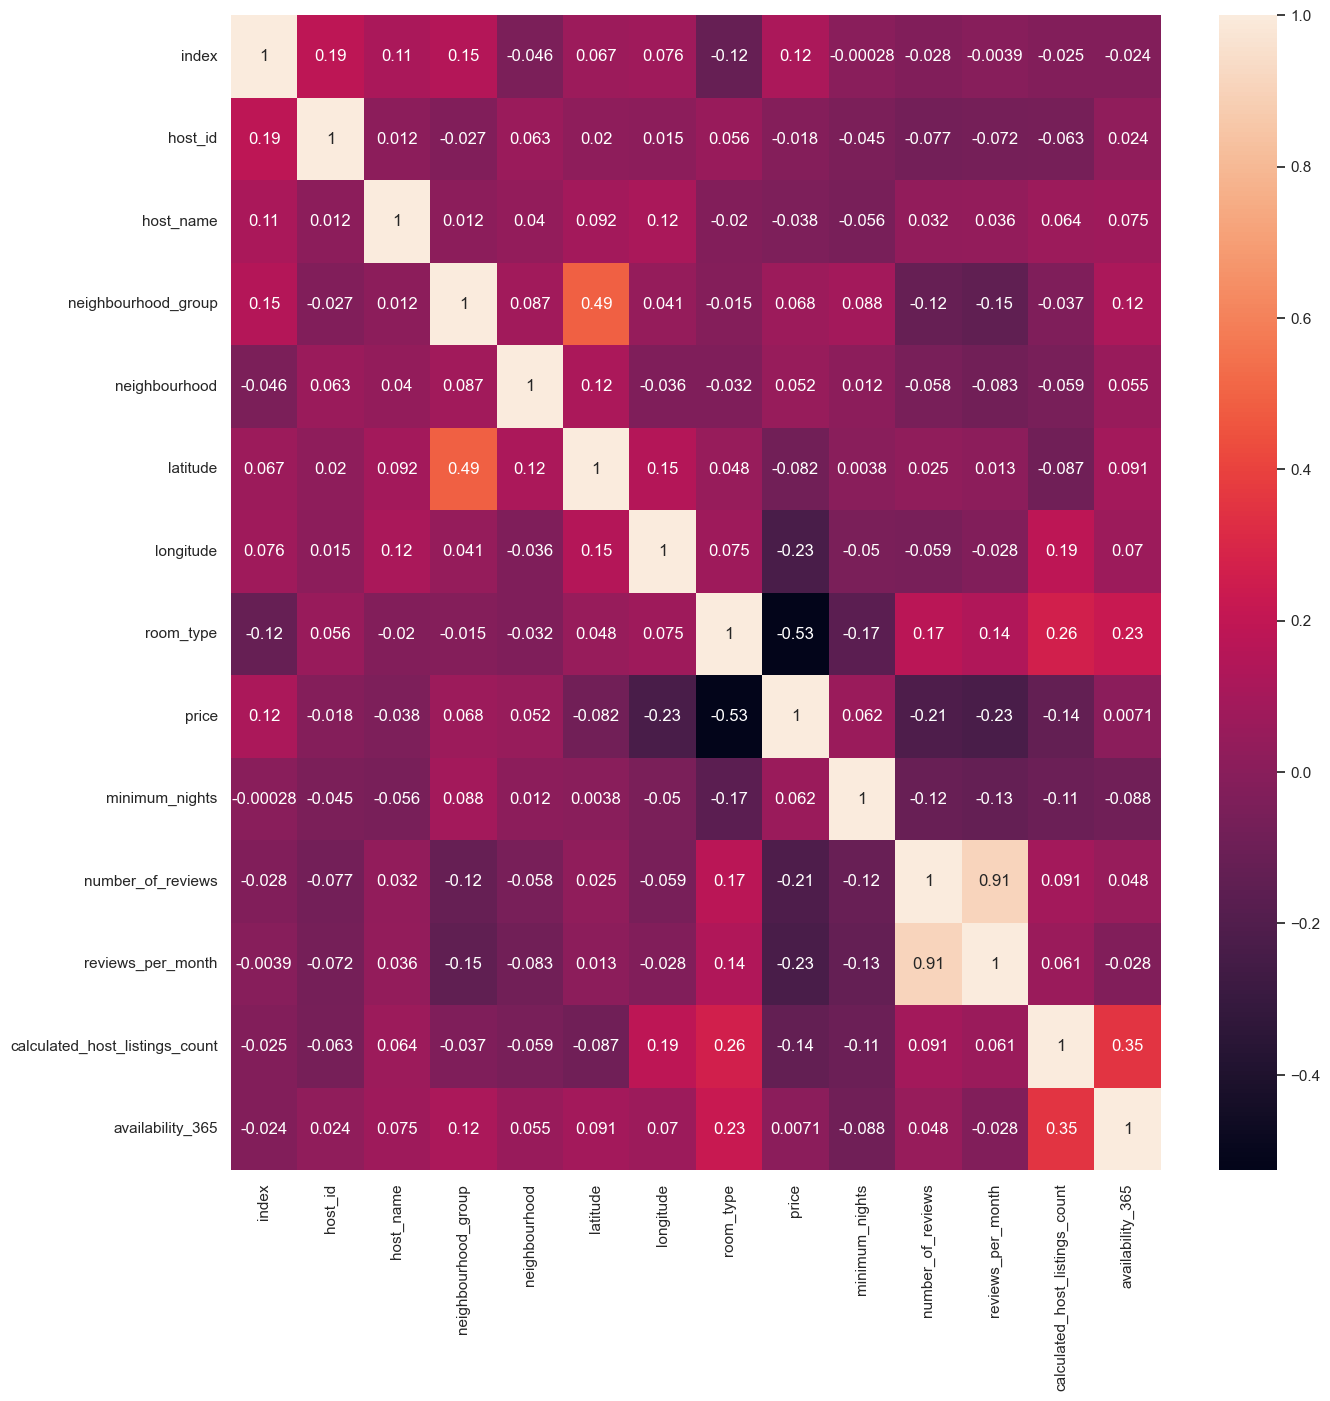

In [26]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap((airbnb_df_enc.corr()),annot=True) 
#from the heatmap of all columns from airbnb_df
# we can find the price is most related to the room_type column it is second most relatec to reviews_per_month column
#number_of_reviews and reviews_per_month are most correlated 0f 0.91. this is positive which means as one of them increases other one also increases
#values closer to 0 means that its not at all correlated

numerical univariant plots

In [27]:
# x="price"
#box plot for the review_per_month column from airbnb_df
x="reviews_per_month"
px.box(airbnb_df[x])
#Box plots provide an easy-to-interpret summary of key statistical measures and help identify outliers, making them useful for comparing data between groups.

In [28]:
#box plot for all number columns form airbnb_df
@interact
def viz(x = list(airbnb_df.select_dtypes('number').columns[4:])):
    sns.boxplot(airbnb_df[x]) 
#in the boxplot of minimum_nights we can see that there are alot of outliers hence lets cap all values to 9
#in the boxplot of price we can see that there are alot of outliers hence lets cap all values to 300
#in the boxplot of reviews_per_month we can see that there are outliers but its all below 5 so in this case we ignore them
#provides information about the central tendency, spread, and skewness of the distribution, as well as the presence of outliers.

interactive(children=(Dropdown(description='x', options=('price', 'minimum_nights', 'number_of_reviews', 'revi…

dealing with ouliers - by capping

In [29]:
airbnb_df['minimum_nights'].values[airbnb_df['minimum_nights'].values>9]=9
airbnb_df['price'].values[airbnb_df['price'].values>300]=300

In [30]:
#distplot plot for all number columns form airbnb_df - univariant
@interact
def viz(x = list(airbnb_df.select_dtypes('number').columns)):
     print(airbnb_df[x].skew())
     sns.distplot(airbnb_df[x],bins=25)
    
# we can se that for price column the distribution plot is positively skewed
#provides information about the shape and distribution of numeric data, including the frequency and density of observations across different ranges or bins of the data.

interactive(children=(Dropdown(description='x', options=('index', 'host_id', 'latitude', 'longitude', 'price',…

In [31]:
#histogram plot for price column from airbnb_df - univariant
# from scipy.special import boxcox1p
# import scipy
# col_cox , lam = boxcox1p(airbnb_df['price'])
# print("New skewness in price Column :  " ,pd.Series(col_cox).skew())
# airbnb_df['price'] = col_cox
# airbnb_df['price'] =np.log1p(airbnb_df['price'] )
# print("New skewness in price Column :  " ,airbnb_df['price'].skew())
px.histogram(airbnb_df, x='price', color='room_type', marginal="violin",
                   hover_data=airbnb_df.columns)
#conclusions
#the price column has overall normal distribution
#now the predictions will not be skewed
#the price for entire home/apt is the highest

categorical univariant plots

In [32]:
airbnb_df.describe(include='category')  

neighbourhood_group neighbourhood        room_type
count                  242           242              242
unique                   5            55                3
top              Manhattan  williamsburg  Entire home/apt
freq                   119            26              133

In [33]:
#count plot for all categorical columns form airbnb_df - univariant for categorical 
#to get the frequency distribution of each categorical column
@interact
def viz(x = list(airbnb_df.select_dtypes('category').columns)):
    sns.countplot(airbnb_df[x]) 
#in the countplot of neighbour_group it was seen that most of airbnbs were in Manhattan neighbourhood. least in staten island
#in the countplot of room_type it was seen that most of airbnbs were entire home/apt type .
#


interactive(children=(Dropdown(description='x', options=('neighbourhood_group', 'neighbourhood', 'room_type'),…

bivariant plots

In [34]:
airbnb_df['price'].describe()

count    242.000000
mean     137.743802
std       68.411196
min       40.000000
25%       85.000000
50%      125.000000
75%      175.000000
max      300.000000
Name: price, dtype: float64

In [35]:
#scatter_mapbox to show the exact location of airnb on the map . 
#the color shows the type of room available
# the size of each point is teh size of the price , so bigger the dot higher the price
px.scatter_mapbox(airbnb_df, lat="latitude", lon="longitude",size="price", color="room_type", mapbox_style="carto-positron",zoom=10) # gps

In [36]:
#scatter plot for countinous columns x="minimum_nights", y="availability_365" from airbnb_df - bivariant for countinous col
#their is one scatter plot for each value of room_type (as row) and neighbourhood_group (as column).
#color of the dot determines the price of that particular airbnb
#we can compare the prices of rooms based on its type, neighnourhood,availability.
px.scatter(airbnb_df, x="minimum_nights", y="availability_365", color="price",hover_name='host_name',
       facet_row="room_type",
       facet_col="neighbourhood_group",
       category_orders={"neighbourhood_group": ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'], 
                        "room_type": ['Private room' 'Entire home/apt' 'Shared room']}
      )
#shared rooms are only available in manhattan at price average of 50 
# entire home/apt room_type was the most expensive of airbnbs  
#Brooklyn and Manhattan has most of the airbnb almost 80% of them
#Staten islan has only one airbnb which is a private room and availability_365 is 312 days and minimum night is 2
# for private rooms its common to have minimumn night of 2  and availabilty varies
#the Bronx has fewer apartments and more single rooms. 
# The rooms and apartments in Manhattan and Brooklyn are more expensive. 

In [37]:
airbnb_df[['neighbourhood_group','reviews_per_month']].value_counts()

neighbourhood_group  reviews_per_month
Brooklyn             0.20                 3
Manhattan            0.38                 3
                     0.43                 3
Brooklyn             1.86                 3
                     2.09                 2
                                         ..
                     2.17                 1
                     2.19                 1
                     2.30                 1
                     2.35                 1
Staten Island        1.66                 1
Length: 204, dtype: int64

In [38]:
#scatter plot for countinous columns x="price", y="reviews_per_month" from airbnb_df - bivariant for countinous col
#color of the dot determines the price of that particular airbnb
# teh size of the dot represent the total number reviews it has gotten till now
#animation is teh last_review year
#we can compare the prices of rooms based on its reviews.
px.scatter(airbnb_df, x="price", y="reviews_per_month", color="neighbourhood_group",size="number_of_reviews",animation_frame=airbnb_df["last_review"].dt.year.sort_values())
# we can see that the latest reviews given for airbnb was between 2019 and 2020
#most of the airbnb had updated reviews on 2019
#the most reviewed airbnbs have the highest reviews_per_month
#reviews_per_month and price of the airbnb has no connection

In [39]:
#violin plot for columns y="reviews_per_month", x="room_type" from airbnb_df - bivariant for countinous col
#color of the dot determines the neighbourhood_group type
#gives probability density of reviews airbnbs based on its room_type and neighbourhood
px.violin(airbnb_df, y="reviews_per_month", x="room_type", color="neighbourhood_group", box=True, points="all") 
# Violin plots are similar to box plots, except that they also show the probability density of the data at different values,

In [40]:
# A barplot is used to represent categorical data along numeric columns from airbnb_df. here i have used @interact so you can choose any column to get the plot
#to aggregate the categorical data based on some function over a numerical data here the aggregate function is mean
#bivariant plot
@interact
def check(column=airbnb_df.select_dtypes('number').columns[3:],
         column1=airbnb_df.select_dtypes('category').columns):
    sns.barplot(airbnb_df[column],airbnb_df[column1])
    plt.show()

interactive(children=(Dropdown(description='column', options=('longitude', 'price', 'minimum_nights', 'number_…

# hr_df datacleaning 

In [41]:
hr_df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0              1       5            4                       0   62506  ...   
1              5       3            3                       0  104437  ...   
2              5       5            3                       0   64955  ...   
3              1       5            3                       0   64991  ...   
4              5       5            3                       0   50825  ...   
..           ...     ...          ...                     ...     ...  ...   
306            1       5            3                       0   65893  ...   
307            5       5            1                       0   48513  ...   
308            1       3            4                       0  220450  ...   
309            1       3            3                       0   89292  ...   
310            1       5            3                       0   45046  ...   

        ManagerName  ManagerID  RecruitmentSource PerformanceScore  \
0    Michael Albert       22.0           LinkedIn          Exceeds   
1        Simon Roup        4.0             Indeed      Fully Meets   
2    Kissy Sullivan       20.0           LinkedIn      Fully Meets   
3      Elijiah Gray       16.0             Indeed      Fully Meets   
4    Webster Butler       39.0      Google Search      Fully Meets   
..              ...        ...                ...              ...   
306  Kissy Sullivan       20.0           LinkedIn      Fully Meets   
307  Brannon Miller       12.0      Google Search              PIP   
308      Janet King        2.0  Employee Referral          Exceeds   
309      Simon Roup        4.0  Employee Referral      Fully Meets   
310   David Stanley       14.0           LinkedIn      Fully Meets   

     EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0                4.60               5                    0   
1                4.96               3                    6   
2                3.02               3                    0   
3                4.84               5                    0   
4                5.00               4                    0   
..                ...             ...                  ...   
306              4.07               4                    0   
307              3.20               2                    0   
308              4.60               5                    6   
309              5.00               3                    5   
310              4.50               5                    0   

    LastPerformanceReview_Date DaysLateLast30 Absences  
0                    1/17/2019              0        1  
1                    2/24/2016              0       17  
2                    5/15/2012              0        3  
3                     1/3/2019              0       15  
4                     2/1/2016              0        2  
..                         ...            ...      ...  
306                  2/28/2019              0       13  
307                   9/2/2015              5        4  
308                  2/21/2019             

In [42]:
hr_df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [43]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

<AxesSubplot:>

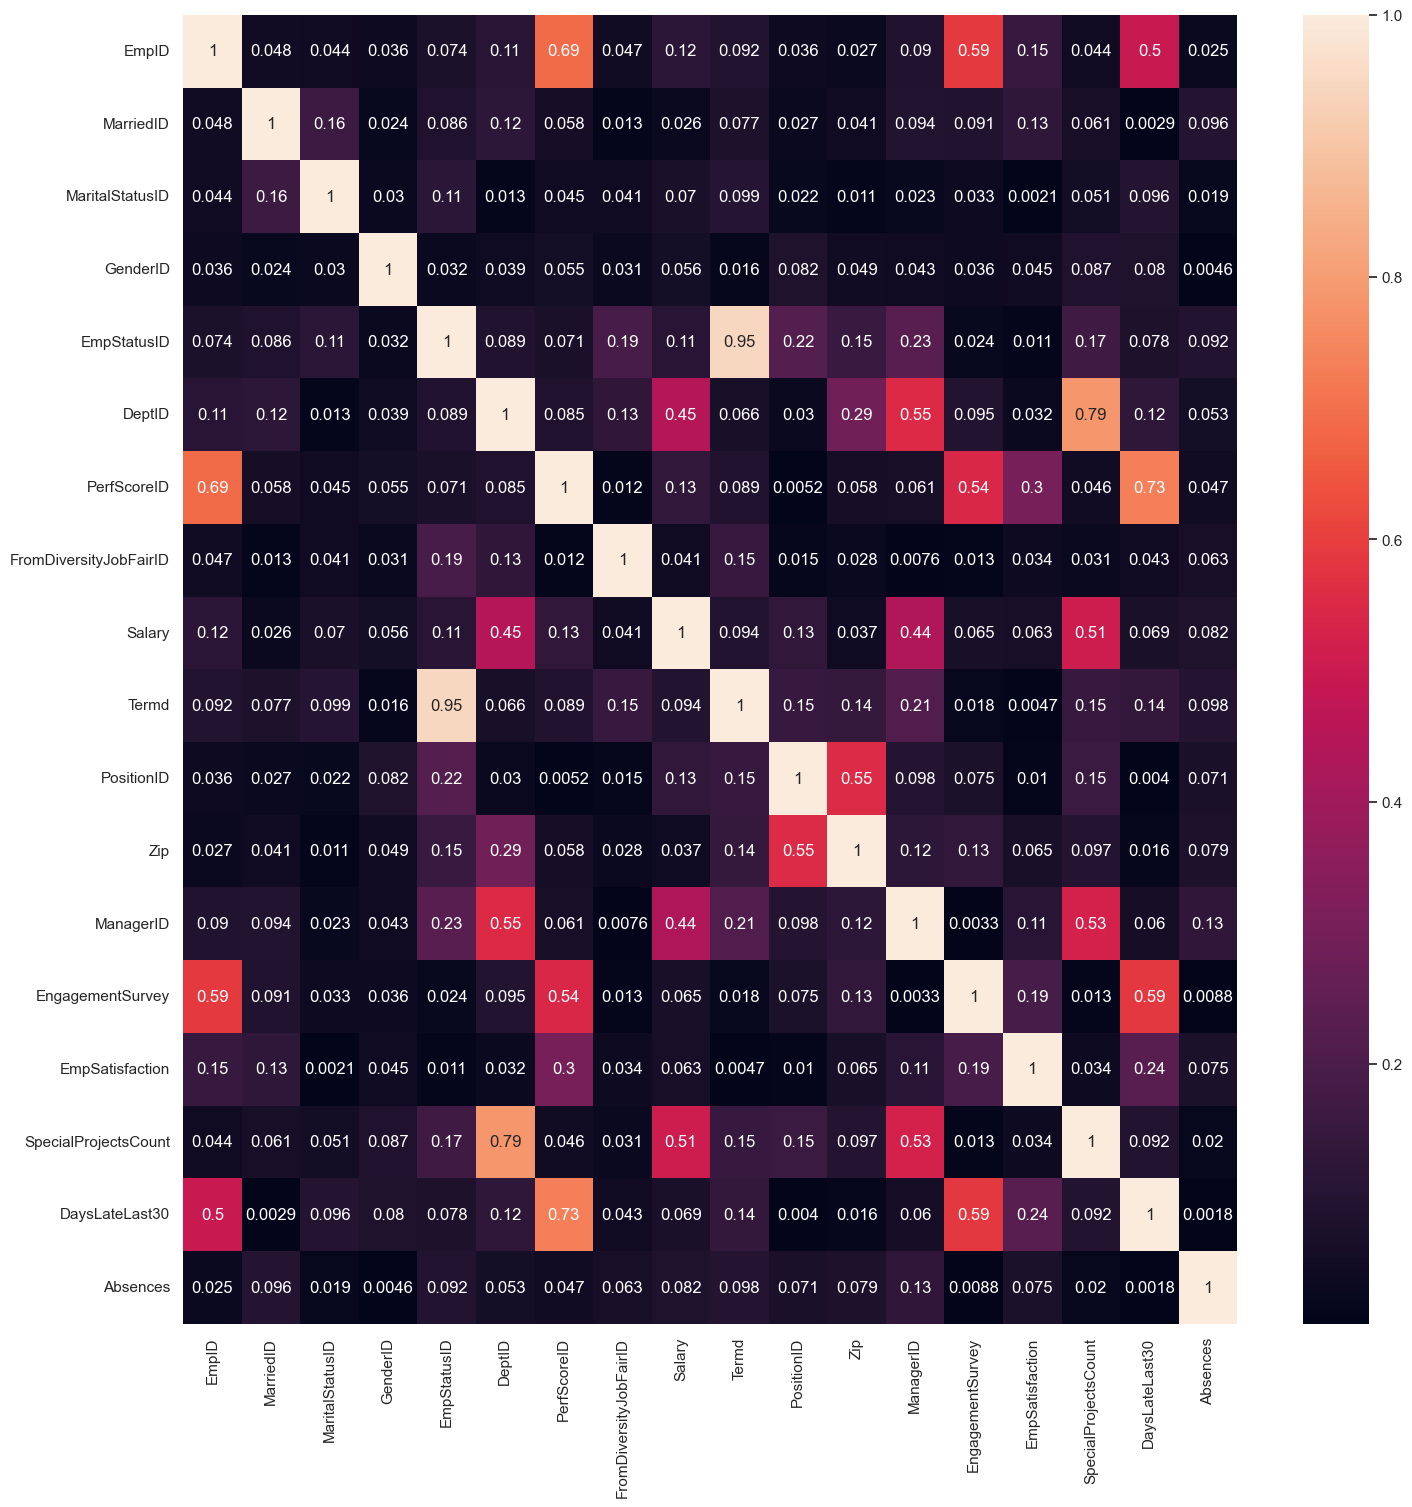

In [44]:
#to find the multicollinearity in the data set
#corr - tell
sns.set(rc={'figure.figsize':(17,17)})
sns.heatmap(abs(hr_df.corr()),annot=True) 

Employee_Name, EmpID

In [45]:
hr_df[['Employee_Name','EmpID']]

Employee_Name  EmpID
0         Adinolfi, Wilson  K  10026
1    Ait Sidi, Karthikeyan     10084
2           Akinkuolie, Sarah  10196
3                Alagbe,Trina  10088
4            Anderson, Carol   10069
..                        ...    ...
306            Woodson, Jason  10135
307        Ybarra, Catherine   10301
308          Zamora, Jennifer  10010
309               Zhou, Julia  10043
310             Zima, Colleen  10271

[311 rows x 2 columns]

In [46]:
hr_df['Employee_Name1']=hr_df['Employee_Name'].str.split(",")
hr_df['Emp_First_Name']=hr_df['Employee_Name1'].apply(lambda x: x[2].strip().capitalize() if len(x)>2 else x[1].strip().capitalize())
hr_df['Emp_Last_Name']=hr_df['Employee_Name1'].apply(lambda x: x[0].strip().capitalize())
hr_df[['Employee_Name1','Emp_First_Name','Emp_Last_Name']]
del hr_df['Employee_Name1']
del hr_df['Employee_Name']

In [47]:
hr_df['EmpID'].nunique()

311

MarriedID, MaritalStatusID ,MaritalDesc

In [48]:
hr_df[['MarriedID', 'MaritalStatusID' ,'MaritalDesc']]
# the columns MarriedID, MaritalStatusID ,MaritalDesc give similar information lets keep one of them
print(hr_df['MarriedID'].value_counts())
print(hr_df['MaritalStatusID'].value_counts())
print(hr_df['MaritalDesc'].value_counts())
# i will keep MaritalDesc as it gives us the most information
#can be use for visualization purpose
#can be encoded later
del hr_df['MarriedID']
del hr_df['MaritalStatusID']

0    187
1    124
Name: MarriedID, dtype: int64
0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64


In [49]:
hr_df

EmpID  GenderID  EmpStatusID  DeptID  PerfScoreID  \
0    10026         1            1       5            4   
1    10084         1            5       3            3   
2    10196         0            5       5            3   
3    10088         0            1       5            3   
4    10069         0            5       5            3   
..     ...       ...          ...     ...          ...   
306  10135         1            1       5            3   
307  10301         0            5       5            1   
308  10010         0            1       3            4   
309  10043         0            1       3            3   
310  10271         0            1       5            3   

     FromDiversityJobFairID  Salary  Termd  PositionID  \
0                         0   62506      0          19   
1                         0  104437      1          27   
2                         0   64955      1          20   
3                         0   64991      0          19   
4                         0   50825      1          19   
..                      ...     ...    ...         ...   
306                       0   65893      0          20   
307                       0   48513      1          19   
308                       0  220450      0           6   
309                       0   89292      0           9   
310                       0   45046      0          19   

                     Position  ...  RecruitmentSource  PerformanceScore  \
0     Production Technician I  ...           LinkedIn           Exceeds   
1                     Sr. DBA  ...             Indeed       Fully Meets   
2    Production Technician II  ...           LinkedIn       Fully Meets   
3     Production Technician I  ...             Indeed       Fully Meets   
4     Production Technician I  ...      Google Search       Fully Meets   
..                        ...  ...                ...               ...   
306  Production Technician II  ...           LinkedIn       Fully Meets   
307   Production Technician I  ...      Google Search               PIP   
308                       CIO  ...  Employee Referral           Exceeds   
309              Data Analyst  ...  Employee Referral       Fully Meets   
310   Production Technician I  ...           LinkedIn       Fully Meets   

    EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0               4.60               5                    0   
1               4.96               3                    6   
2               3.02               3                    0   
3               4.84               5                    0   
4               5.00               4                    0   
..               ...             ...                  ...   
306             4.07               4                    0   
307             3.20               2                    0   
308             4.60               5                    6   
309             5.00               3                    5   
310             4.50               5                    0   

    LastPerformanceReview_Date DaysLateLast30 Absences Emp_First_Name  \
0                    1/17/2019              0        1      Wilson  k   
1                    2/24/2016              0       17    Karthikeyan   
2                    5/15/2012              0        3          Sarah   
3                     1/3/2019              0       15          Trina   
4                     2/1/2016              0        2          Carol   
..                         ...            ...      ...            ...   
306                  2/28/2019              0       13          Jason   
307                   9/2/2015              5        4      Catherine   
308                  2/21/2019              0       16       Jennifer   
309                   2/1/2019              0       11          Julia   
310                  1/30/2019              0        2        Colleen   

    Emp_Last_Name  
0        Adinolfi  
1        Ait sidi  
2      Akinkuolie  
3          Alagbe  


GenderID  ,Sex

In [50]:
hr_df[['GenderID' ,'Sex']]
# let keep only one of them here 
#i will keep Sex column for visualization purpose only 
#later i will encode it
print(hr_df['GenderID'].value_counts())
print(hr_df['Sex'].value_counts())
del hr_df['GenderID']

0    176
1    135
Name: GenderID, dtype: int64
F     176
M     135
Name: Sex, dtype: int64


In [51]:
hr_df[['Termd' ,'EmpStatusID','EmploymentStatus']]
# let keep only one of them here 
#i will keep Sex column for visualization purpose only 
#later i will encode it
print(hr_df['Termd'].value_counts())
print(hr_df['EmpStatusID'].value_counts())
print(hr_df['EmploymentStatus'].value_counts())
# del hr_df['GenderID']

0    207
1    104
Name: Termd, dtype: int64
1    184
5     88
3     14
4     14
2     11
Name: EmpStatusID, dtype: int64
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64


In [52]:
hr_df.columns

Index(['EmpID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences',
       'Emp_First_Name', 'Emp_Last_Name'],
      dtype='object')

In [53]:
hr_df['ManagerID'].value_counts()

18.0    22
20.0    22
16.0    22
12.0    22
19.0    21
14.0    21
22.0    21
11.0    21
2.0     19
4.0     17
7.0     14
17.0    14
39.0    13
21.0    13
10.0     9
13.0     8
5.0      7
1.0      6
6.0      4
15.0     3
9.0      2
3.0      1
30.0     1
Name: ManagerID, dtype: int64

dealing with null values

In [54]:
hr_df.isnull().sum()

EmpID                           0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanc

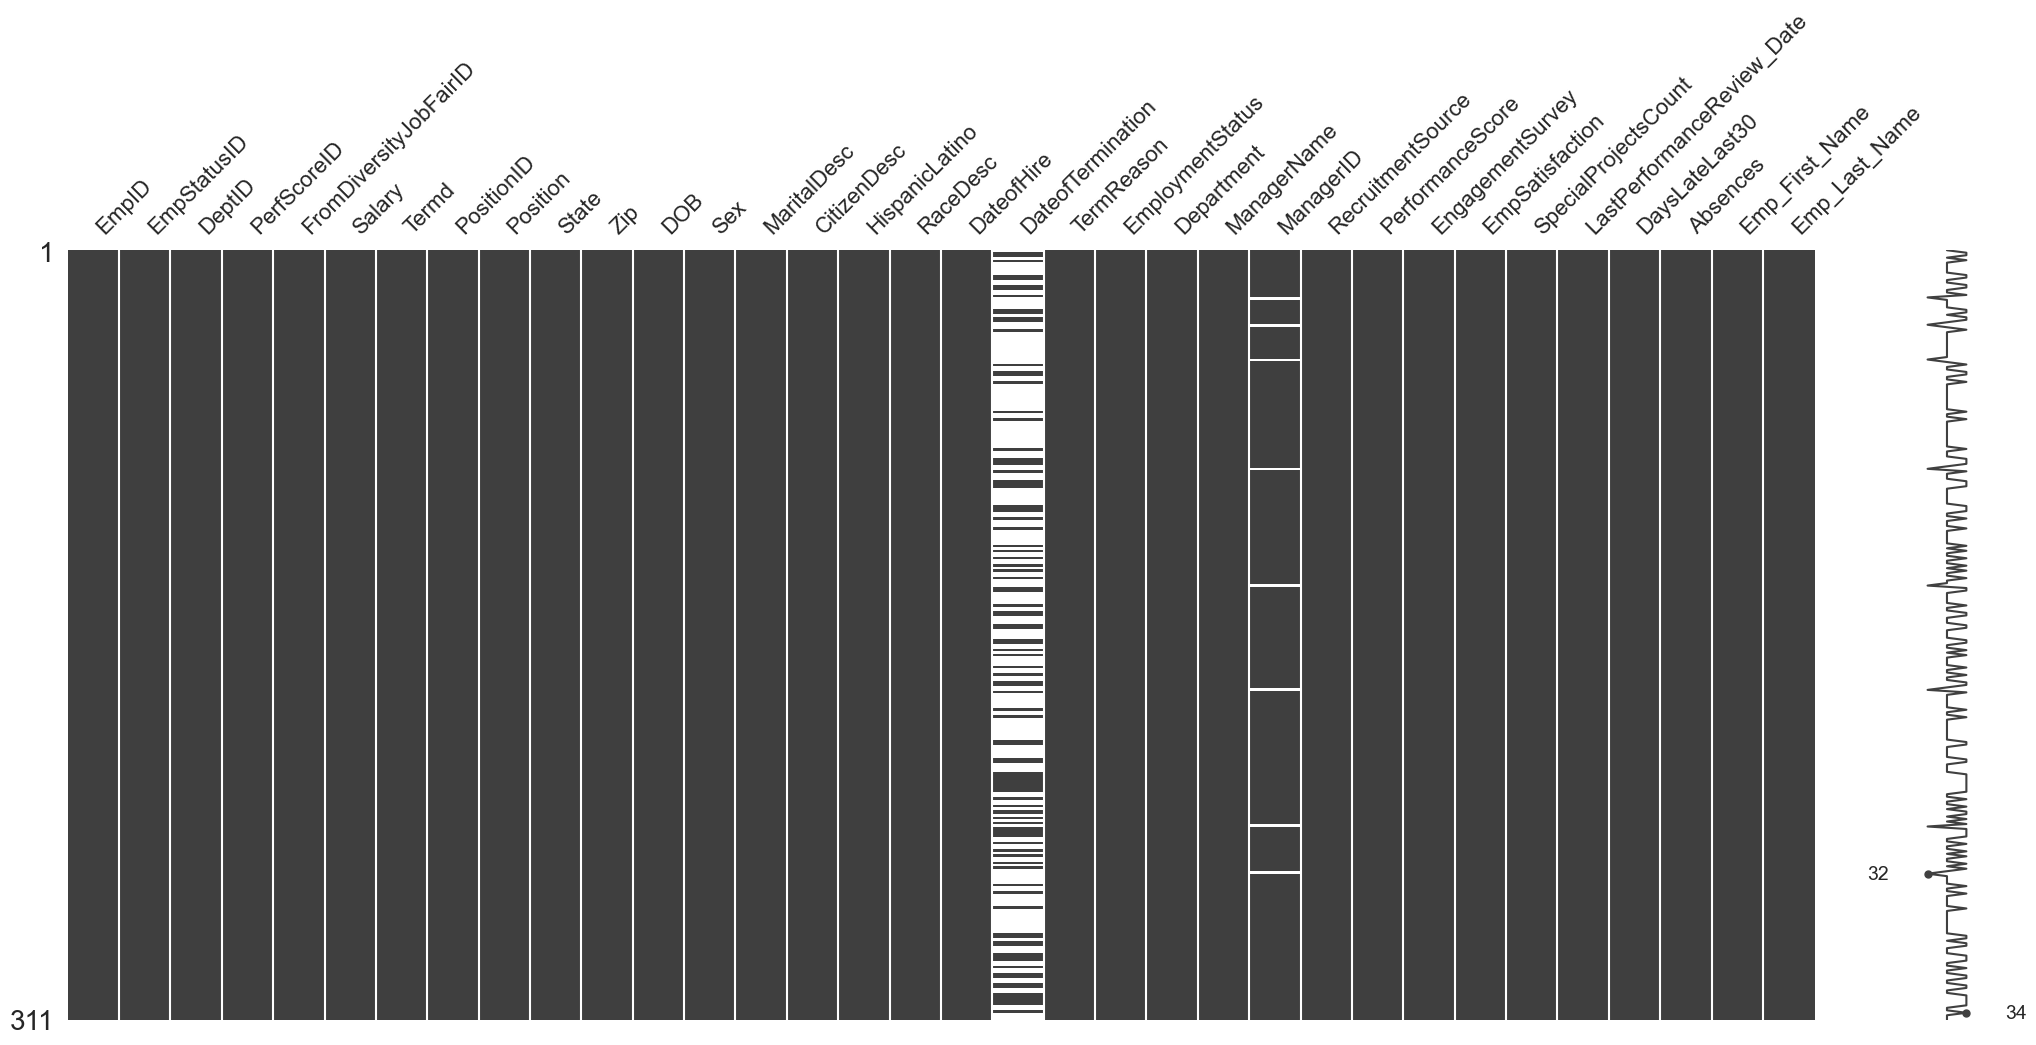

In [55]:
# lets visualize the missing values
import missingno as msno
msno.matrix(hr_df)#missingness matr
plt.show() #to show the plot
# looks like the row with missing last_review also has mising value in reviews_per_month

In [56]:
missing=hr_df[hr_df['DateofTermination'].isna()]
complete= hr_df[~hr_df['DateofTermination'].isna()]

In [57]:
hr_df['DateofTermination']

0            NaN
1      6/16/2016
2      9/24/2012
3            NaN
4       9/6/2016
         ...    
306          NaN
307    9/29/2015
308          NaN
309          NaN
310          NaN
Name: DateofTermination, Length: 311, dtype: object

In [58]:
print(missing['Termd'].value_counts())
#that means the date of termination are missing for those employees who are still active
#so lets just fill it with 0 - meaning not terminated yet
hr_df['DateofTermination'].fillna('0000-00-00 00:00:00',inplace =True)#impute any value

0    207
Name: Termd, dtype: int64


In [59]:
hr_df['DateofTermination']

0      0000-00-00 00:00:00
1                6/16/2016
2                9/24/2012
3      0000-00-00 00:00:00
4                 9/6/2016
              ...         
306    0000-00-00 00:00:00
307              9/29/2015
308    0000-00-00 00:00:00
309    0000-00-00 00:00:00
310    0000-00-00 00:00:00
Name: DateofTermination, Length: 311, dtype: object

In [60]:
#Isolate missing and complete values aside.
missing=hr_df[hr_df['ManagerID'].isna()]
complete= hr_df[~hr_df['ManagerID'].isna()]
            #find any pattern for why there are missing value.
# #based on the info findon what does col depend on?
# sorted_df=df.sort_values(by=’col1’)
# msno.matrix(df)  plt.show()# how the values of col1 effect col


In [61]:
print('manager name that has no ManagerID\n',missing['ManagerName'].value_counts())
hr_df[(hr_df['Emp_First_Name']=="Webster") | (hr_df['Emp_Last_Name']=="Butler")]
# we can see that there is no employee with name Webster Butler 

manager name that has no ManagerID
 Webster Butler    8
Name: ManagerName, dtype: int64


Empty DataFrame
Columns: [EmpID, EmpStatusID, DeptID, PerfScoreID, FromDiversityJobFairID, Salary, Termd, PositionID, Position, State, Zip, DOB, Sex, MaritalDesc, CitizenDesc, HispanicLatino, RaceDesc, DateofHire, DateofTermination, TermReason, EmploymentStatus, Department, ManagerName, ManagerID, RecruitmentSource, PerformanceScore, EngagementSurvey, EmpSatisfaction, SpecialProjectsCount, LastPerformanceReview_Date, DaysLateLast30, Absences, Emp_First_Name, Emp_Last_Name]
Index: []

[0 rows x 34 columns]

In [62]:
hr_df['ManagerID'].value_counts()

18.0    22
20.0    22
16.0    22
12.0    22
19.0    21
14.0    21
22.0    21
11.0    21
2.0     19
4.0     17
7.0     14
17.0    14
39.0    13
21.0    13
10.0     9
13.0     8
5.0      7
1.0      6
6.0      4
15.0     3
9.0      2
3.0      1
30.0     1
Name: ManagerID, dtype: int64

In [63]:
#taht means the webster butler is a new employee and has not been assigned a id
hr_df['ManagerID'].fillna('40',inplace =True)#impute

In [64]:
#changing datatype of columns to what makes the most sense

hr_df['EmpStatusID'] = hr_df['EmpStatusID'].astype('object')
hr_df['DeptID'] = hr_df['DeptID'].astype('object')
hr_df['PerfScoreID'] = hr_df['PerfScoreID'].astype('object')
hr_df['PositionID'] = hr_df['PositionID'].astype('object')
hr_df['ManagerID'] = hr_df['ManagerID'].astype('int')
# del hr_df['ManagerID1']
# hr_df['ManagerID'] = hr_df['ManagerID'].astype('category')

hr_df['State'] = hr_df['State'].str.lower().str.strip().astype('category')
hr_df['MaritalDesc'] = hr_df['MaritalDesc'].str.lower().str.strip().astype('category')
hr_df['CitizenDesc'] = hr_df['CitizenDesc'].str.lower().str.strip().astype('category')
hr_df['RaceDesc'] = hr_df['RaceDesc'].str.lower().str.strip().astype('category')
hr_df['HispanicLatino']=hr_df['HispanicLatino'].str.lower().str.strip().astype('category')
hr_df['FromDiversityJobFairID'] = hr_df['FromDiversityJobFairID'].astype('category')
hr_df['Sex'] = hr_df['Sex'].str.lower().str.strip().astype('category')

hr_df['TermReason']=hr_df['TermReason'].str.lower().str.strip().astype('category')
hr_df['PerformanceScore'] = hr_df['PerformanceScore'].str.lower().str.strip().astype('category')
hr_df['Termd'] = hr_df['Termd'].astype('category')


hr_df['EmploymentStatus']=hr_df['EmploymentStatus'].str.lower().str.strip().astype('category')
hr_df['Department']=hr_df['Department'].str.lower().str.strip().astype('category')
hr_df['ManagerName']=hr_df['ManagerName'].str.lower().str.strip().astype('category')
hr_df['RecruitmentSource']=hr_df['RecruitmentSource'].str.lower().str.strip().astype('category')
hr_df['Position']=hr_df['Position'].str.lower().str.strip().astype('category')



hr_df['Salary'] = hr_df['Salary'].astype('float')
hr_df['SpecialProjectsCount'] = hr_df['SpecialProjectsCount'].astype('int')
hr_df['EmpSatisfaction'] = hr_df['EmpSatisfaction'].astype('int')
hr_df['DaysLateLast30'] = hr_df['DaysLateLast30'].astype('int')

hr_df['DOB']=pd.to_datetime(hr_df['DOB'],
    infer_datetime_format = True, # Infer datetime format
    errors = 'coerce') # Return missing value for error)
hr_df['DateofHire']=pd.to_datetime(hr_df['DateofHire'],
    infer_datetime_format = True, # Infer datetime format
    errors = 'coerce') # Return missing value for error)
hr_df['DateofTermination']=pd.to_datetime(hr_df['DateofTermination'],
    infer_datetime_format = True, # Infer datetime format
    errors = 'coerce') # Return missing value for error)
hr_df['LastPerformanceReview_Date']=pd.to_datetime(hr_df['LastPerformanceReview_Date'],
    infer_datetime_format = True, # Infer datetime format
    errors = 'coerce') # Return missing value for error)

# hr_df visualizations

heatmap - findthe multicollinearity in the dataset hr_df

In [65]:
df_relation = hr_df[[ 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Sex', 'ManagerID', 
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30',
       'Absences']]

<AxesSubplot:>

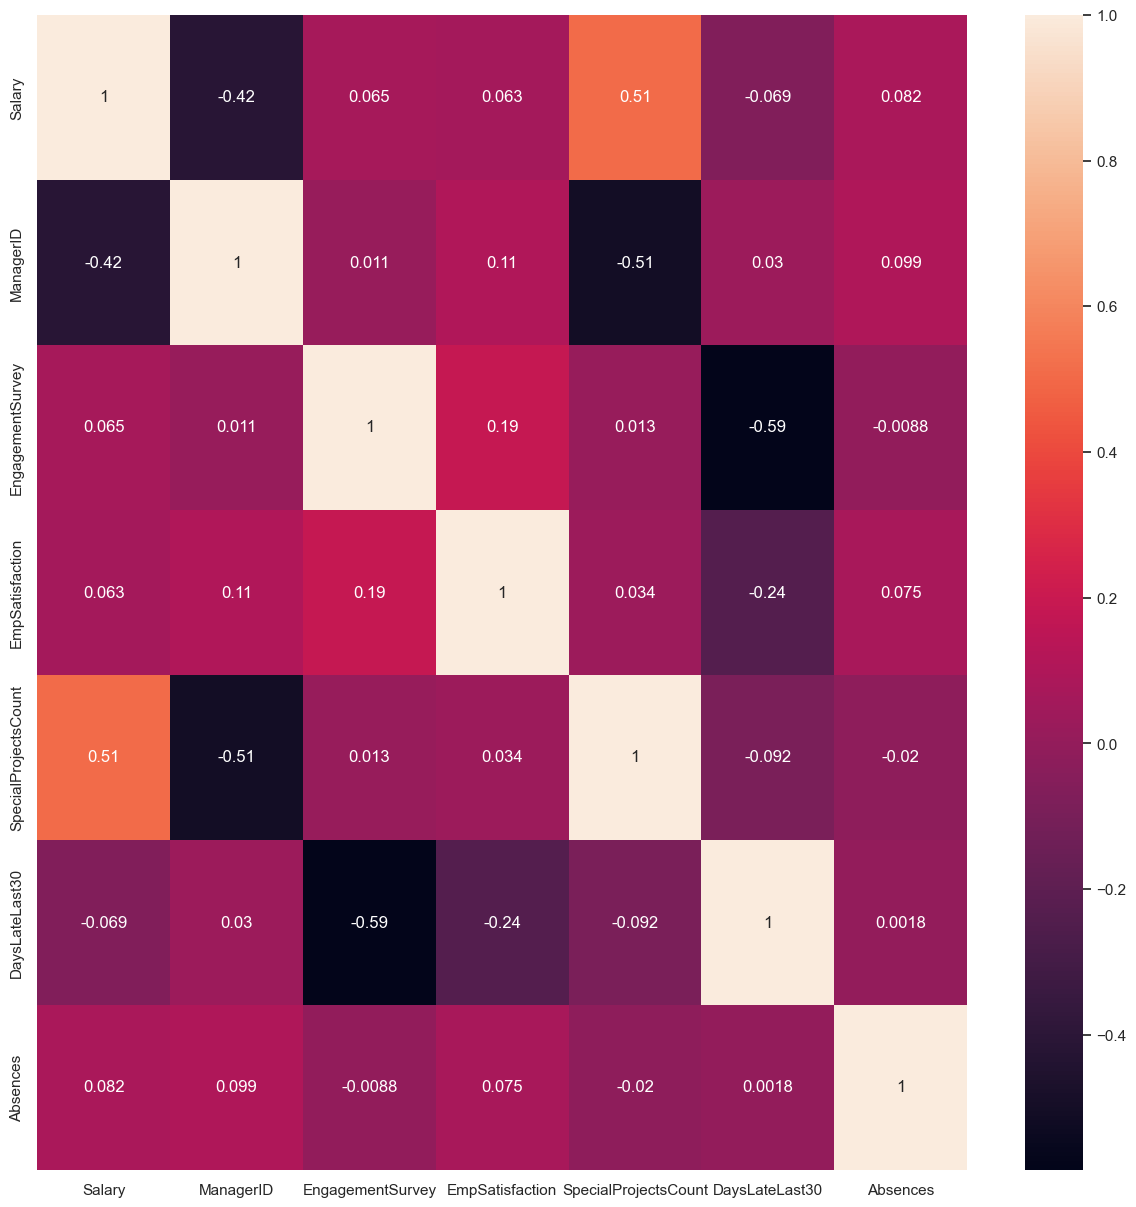

In [66]:
#visualize the correlation between pairs of variables in a dataset, with warmer colors indicating higher positive correlation and cooler colors indicating negative correlation
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap((df_relation.corr()),annot=True) 

In [67]:
from sklearn.preprocessing import LabelEncoder
col_dtypes=dict(hr_df.dtypes)
hr_df_enc=hr_df.copy()
for col, dtype in col_dtypes.items():
    if str(dtype)=='object' or str(dtype)=='category':
       le=LabelEncoder()  
       hr_df_enc[col]=le.fit_transform(hr_df[col])
hr_df_enc

EmpID  EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  \
0    10026            0       4            3                       0   
1    10084            4       2            2                       0   
2    10196            4       4            2                       0   
3    10088            0       4            2                       0   
4    10069            4       4            2                       0   
..     ...          ...     ...          ...                     ...   
306  10135            0       4            2                       0   
307  10301            4       4            0                       0   
308  10010            0       2            3                       0   
309  10043            0       2            2                       0   
310  10271            0       4            2                       0   

       Salary  Termd  PositionID  Position  State  ...  RecruitmentSource  \
0     62506.0      0          18        21     10  ...                  5   
1    104437.0      1          26        29     10  ...                  4   
2     64955.0      1          19        22     10  ...                  5   
3     64991.0      0          18        21     10  ...                  4   
4     50825.0      1          18        21     10  ...                  3   
..        ...    ...         ...       ...    ...  ...                ...   
306   65893.0      0          19        22     10  ...                  5   
307   48513.0      1          18        21     10  ...                  3   
308  220450.0      0           5         5     10  ...                  2   
309   89292.0      0           8         6     10  ...                  2   
310   45046.0      0          18        21     10  ...                  5   

    PerformanceScore  EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  \
0                  0              4.60                5                     0   
1                  1              4.96                3                     6   
2                  1              3.02                3                     0   
3                  1              4.84                5                     0   
4                  1              5.00                4                     0   
..               ...               ...              ...                   ...   
306                1              4.07                4                     0   
307                3              3.20                2                     0   
308                0              4.60                5                     6   
309                1              5.00                3                     5   
310                1              4.50                5                     0   

     LastPerformanceReview_Date  DaysLateLast30 Absences Emp_First_Name  \
0                    2019-01-17               0        1            269   
1                    2016-02-24               0       17            141   
2                    2012-05-15               0        3            238   
3                    2019-01-03               0       15            262   
4                    2016-02-01               0        2             47   
..                          ...             ...      ...            ...   
306                  2019-02-28               0       13            116   
307                  2015-09-02               5        4             49   
308                  2019-02-21               0       16            122   
309                  2019-02-01               0       11            134   
310                  2019-01-30               0        2             58   

     Emp_Last_Name  
0                0  
1                1  
2                2  
3                3  
4                4  
..             ...  
306            289  
307            290  
308            291  
309            292  
310            293  

[311 rows x 34 columns]

<AxesSubplot:>

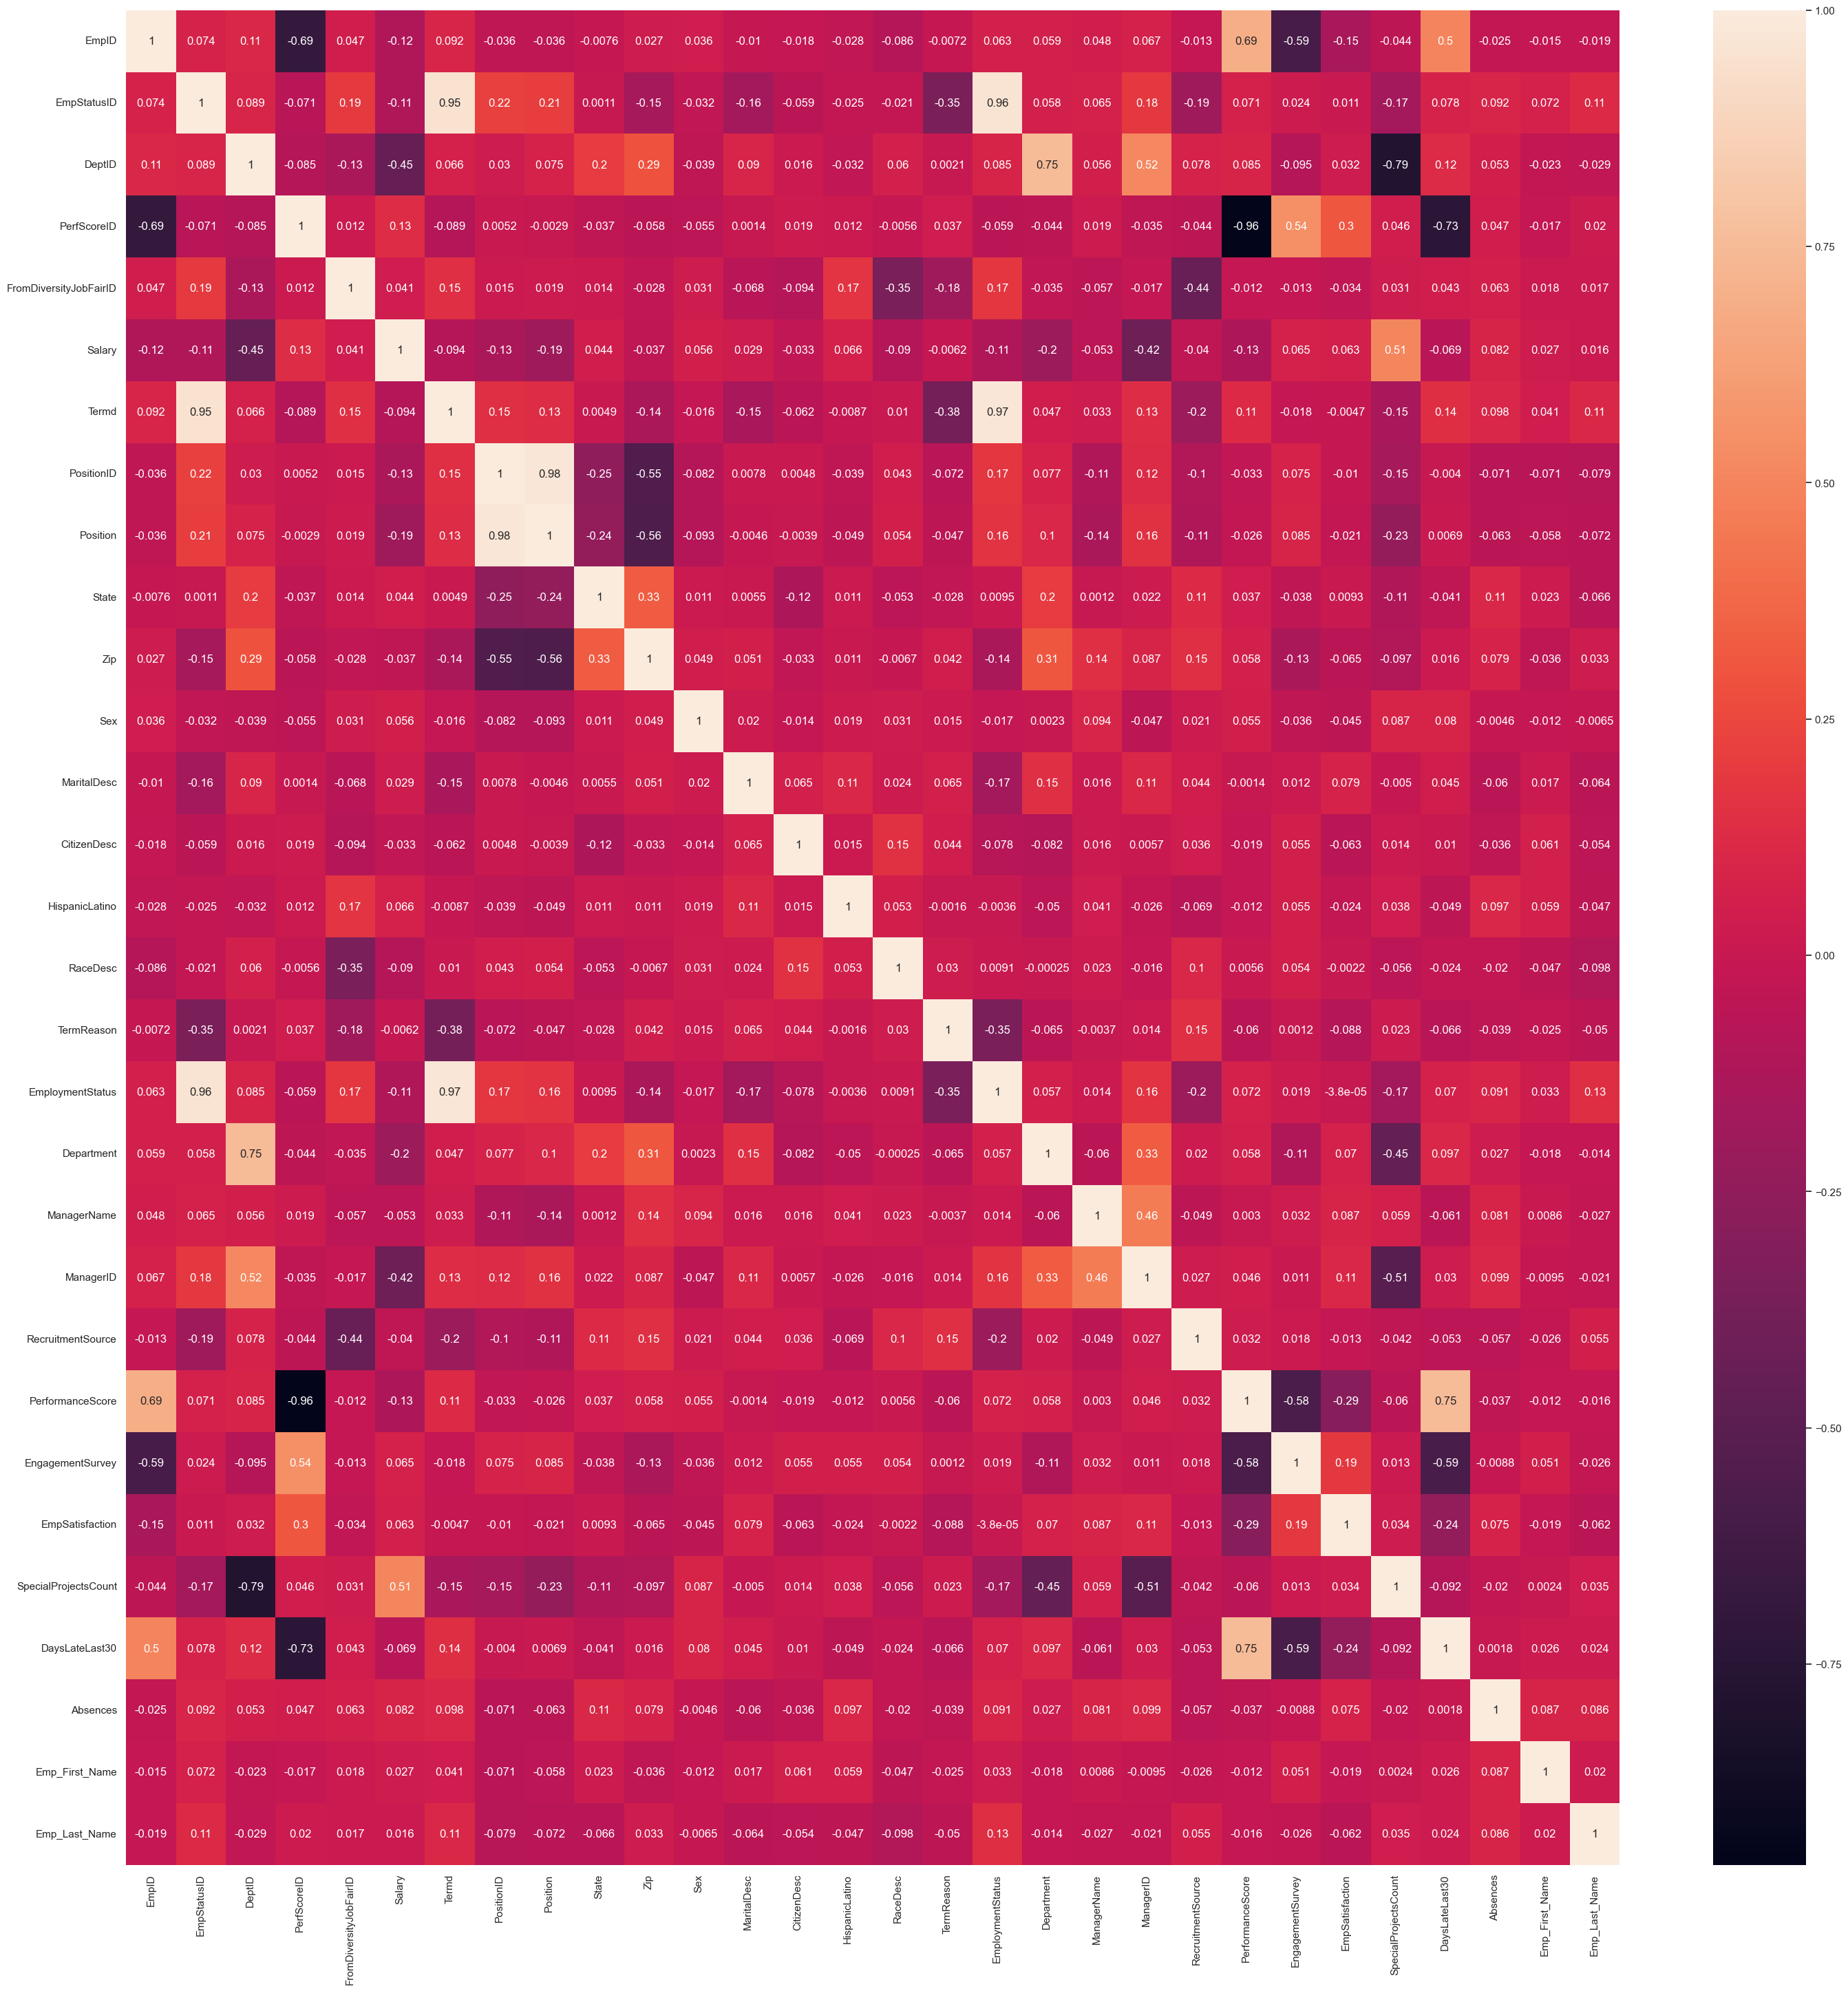

In [68]:
sns.set(rc={'figure.figsize':(35,35)})
# print(hr_df_enc.corr()['TermReason'].sort_values())
sns.heatmap((hr_df_enc.corr()),annot=True)
# here we can see that the salary of an employee depends on SpecialProjectsCount and then on the DeptID ie which department they work on
# 'termd','EmploymentStatus',TermReason,'EmpStatusID' corelated most with the LastPerformanceReview_Date and DateofTermination that means the termination of a employee is decided by its last performanvce review

numerical univariant plots

In [69]:
#box plot for numeric column Salary from hr_df - univariant for countinous col
#graphical summary of Salary column through its quartiles, displaying the median, interquartile range, and any outliers.
#It provides information about the central tendency, variability, and skewness of the data distribution 
px.box(hr_df['Salary'])
#here all values above 96.82k are outliers ,median is 62.8k

In [70]:
hr_df['SpecialProjectsCount'].value_counts()

0    241
6     21
5     21
7     12
4      9
3      3
8      2
2      1
1      1
Name: SpecialProjectsCount, dtype: int64

In [71]:
#box plot for any numeric column from hr_df - univariant for countinous col
#graphical summary of the choosen column through its quartiles, displaying the median, interquartile range, and any outliers.
#It provides information about the central tendency, variability, and skewness of the data distribution 
@interact
def viz(x = list(hr_df.select_dtypes('number').columns[1:])):
    sns.boxplot(hr_df[x]) 

interactive(children=(Dropdown(description='x', options=('Salary', 'Zip', 'ManagerID', 'EngagementSurvey', 'Em…

In [72]:
#distplot for any numeric column from hr_df - univariant for countinous col
#distribution plot, is a graphical representation of the distribution of a numeric dataset. 
#he plot can be used to find teh choosen numeric column's central tendency, variability, and shape of the data distribution, and can also be used to identify any potential outliers or skewness in the data.
@interact
def viz(x = list(hr_df.select_dtypes('number').columns)):
     print("skewness ",hr_df[x].skew())
     sns.distplot(hr_df[x],bins=25)
# here salary is left skewed 
#EngagementSurvey is right skewes
#empsatisfaction is not that much skewd
#SpecialProjectCount is highighly skewes
#daysLateLast30 is right skewed
#absense is not taht much skewed
# we can use boxcot to remove the skewness 

interactive(children=(Dropdown(description='x', options=('EmpID', 'Salary', 'Zip', 'ManagerID', 'EngagementSur…

categorical univariant plots

In [73]:
#box plot for Sex categorical column from hr_df - univariant for categorical col
#distribution plot, is a graphical representation of the distribution of a categorical dataset.
#to understand the distribution of male and females in the company. here female are more tahn the males
px.histogram(hr_df,x="Sex")

In [74]:
# df['date_column'] = pd.to_datetime(df['date_column'])
# hr_df['yearofHired'] = hr_df['DateofHire'].dt.year
fig=px.scatter(hr_df,  y='Salary',  x='EmpID',  color='Department',  animation_frame=hr_df['DateofHire'].dt.year,  animation_group='Department')
# fig.update_layout({'yaxis': {'range': [0, 500000]},'xaxis': {'range': [-100000, 2500000]}})
fig['layout'].pop('updatemenus')
fig.show()


In [75]:
#count plot for any categorical column from hr_df - univariant for categorical col
#count plot is a type of bar plot that displays the frequency or count of observations in each category of a categorical variable. 
#It is used to visualize the distribution of categorical data and can be used to identify any imbalances or biases in the data distribution. 
#The height of each bar represents the count of observations in that category.
@interact
def viz(x = list(hr_df.select_dtypes('object').columns)):
    sns.countplot(hr_df[x]) 

interactive(children=(Dropdown(description='x', options=('EmpStatusID', 'DeptID', 'PerfScoreID', 'PositionID',…

In [76]:
#count plot for any categorical column from hr_df with hue parameter which will have value of any other categorical column- univariant for categorical col
#count plot is a type of bar plot that displays the frequency or count of observations in each category of a categorical variable. 
#It is used to visualize the distribution of categorical data and can be used to identify any imbalances or biases in the data distribution. 
#The height of each bar represents the count of observations in that category.
#basically splits each category of the first column into teh n categories of second categorical column 
@interact
def viz(x = list(hr_df.select_dtypes('category').columns[2:]),
       hue = list(hr_df.select_dtypes('category').columns)):
    sns.countplot(hr_df[x],hue=hr_df[hue]) 

interactive(children=(Dropdown(description='x', options=('Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDe…

bivarant analyis plots

In [77]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       311 non-null    int64         
 1   EmpStatusID                 311 non-null    object        
 2   DeptID                      311 non-null    object        
 3   PerfScoreID                 311 non-null    object        
 4   FromDiversityJobFairID      311 non-null    category      
 5   Salary                      311 non-null    float64       
 6   Termd                       311 non-null    category      
 7   PositionID                  311 non-null    object        
 8   Position                    311 non-null    category      
 9   State                       311 non-null    category      
 10  Zip                         311 non-null    int64         
 11  DOB                         311 non-null    datetime64[ns]

In [78]:
# to get the experience of the employee in this company
from datetime import datetime
def calc_experience(row):
    if pd.isnull(row['DateofTermination']):
        # if termination date is missing, use current date
        end_date = datetime.now()
    else:
        end_date = row['DateofTermination']
    experience_years = (end_date - row['DateofHire']).days / 365.25
    return round(experience_years, 1)

# apply the function to create a new column 'experience'
hr_df['experience_in_company'] = hr_df.apply(calc_experience, axis=1)

# print the updated DataFrame
hr_df['experience_in_company']

0      11.8
1       1.2
2       1.2
3      15.3
4       5.2
       ... 
306     8.8
307     7.1
308    13.1
309     8.1
310     8.6
Name: experience_in_company, Length: 311, dtype: float64

In [79]:
#performnace score
#bar to check how the performnace score is affected by the DaysLateLast30 and salary # here we are finding out which departant has the best performance.
## visualizing total employees performance score in each department
px.scatter(hr_df,
       y='DaysLateLast30',
       x='EmpSatisfaction',
       size='Salary',
       facet_row='PerformanceScore',
       facet_col='Department',
       width=1050,
       height=700,
       color='experience_in_company',hover_data=['Salary'],hover_name='Salary'         
          )

#conclusion
# we can see that the employees with pip performance score tend to come to work late and have engagement survey below 3
#employees who are never late to work have exceeds or fully meet performance score and high engagemnet score
# the max number of days where a employee was late is 6 days
#the mode of EmpSatisfaction is 4 that means most of the employees is happy with their job
# the more experience employee have in the company they are more likely to get higher salary
#emloyees recruited with employee referal are most likely to have exceeds performance
# we can see that in all the departments the employees fully meet there performance score.
#production department has the most employees with exceeds performance and highest EmpSatisfaction
# executive office and admin offices departments do not exceed in their performance score nor they have PIP performance score
# employess with low empSatisfaction and low EngagementSurvey have PIP performance score where as employees with high empSatisfaction and high EngagementSurvey have exceeds performance score

In [80]:
#why termd
#histogram to understand the relation between sum of absences and days employee come late, does that effect their termination
px.bar(hr_df, x="Termd",y="DaysLateLast30",color="Absences",facet_col='PerformanceScore',
             hover_data=['TermReason','EmploymentStatus','LastPerformanceReview_Date'],barmode='group')
#conclusion
# we can see that employees who take more absence of leave and has performance of need improvement are more likely to be terminated
#we can also see that the employees who are not late to work tend to take more absences and vice-versa

In [81]:
# A barplot is used to represent categorical data along numeric columns from airbnb_df. with another categorical column as hue. 
#here i have used @interact so you can choose any column to get the plot
#to aggregate the categorical data based on some function over a numerical data here the aggregate function is mean
#bivariant plot
@interact
def viz(x = list(hr_df.select_dtypes('category').columns),
       y = list(hr_df.select_dtypes('number').columns[2:]),
       hue = list(hr_df.select_dtypes('category').columns[1:])):
      sns.barplot(hr_df[x], hr_df[y], hue = hr_df[hue])


interactive(children=(Dropdown(description='x', options=('FromDiversityJobFairID', 'Termd', 'Position', 'State…

In [82]:
# histogram plot to check the distribution of each gender in entire departments
# @interact
# def viz(y = ['Sex','HispanicLatino','RaceDesc'],x=['EmpID','Position','Department','Manager']):
@interact
def viz(x = ['Department','Position','Manager','Termd','PerformanceScore','SpecialProjectsCount'],
        y=['count','Salary'],
       hue = ['Sex','HispanicLatino','RaceDesc','CitizenDesc','MaritalDesc']):
#      px.bar(hr_df[x],color=hr_df[hue]) 
       if y=='count':
         sns.countplot(hr_df[x],hue=hr_df[hue])
       else:
        sns.barplot(hr_df[x],hr_df[y],hue=hr_df[hue])

#conclusion
#we can see that the production departmnet has the most number of employees
#in each department the ratio of male to female is almost 1:1.5
#executive office has the least number of employees with only 1 female worker
#Most of the employees are white and the main reason is that they are American citizens, and nearly half of the employees are black or Americans


interactive(children=(Dropdown(description='x', options=('Department', 'Position', 'Manager', 'Termd', 'Perfor…

In [83]:
# visualizing diversity in each department
#histogram - categorical univariant plot- representation of the distribution of employees in a department based on their race
#It consists of a series of contiguous bars or rectangles, where the area of each bar represents the frequency or proportion of data points falling within a specified range or bin of the data.
fig1=px.histogram(hr_df, x = hr_df['Department'], color= hr_df['RaceDesc'], title="Diversity in each department")
#conclusions from the plot
# we can see taht production department has the most diversity out of all teh departments
#in all teh department white race is teh majority.
#in the entire company the american indian or alaska native are the teh minority. only production and sales department have employes from thsi race


#sunburst - hierarchical visualization-  that displays the distribution of salary into categorical variable and its subcategories as nested rings here its 'Sex','RaceDesc', 'CitizenDesc'. 
#Each ring represents a different level of the hierarchy, and the size and color of each segment represent the salary of observations within that category. 
#The plot can be used to explore the distribution of complex and multi-level categorical data and to identify any patterns or trends in the data.
#visualize the salary given to employees based on sex,race and citizenship
fig2=px.sunburst(hr_df, path=['Sex','RaceDesc', 'CitizenDesc'], values='Salary',title="Sunburst Chart of Diversity")
#conclusions from the plot- Summary of Diversity based on Department
# almost 80% of employes are us citizens and get more salary than other minority
#there more female employees than the male employees
# both male and female employees have similar distribution of the race.
#the departments that have American citizens only are the Admin Offices and Executive Office
#Most of the employees are white and the main reason is that they are American citizens, and nearly half of the employees are black or Americans
fig1.show()
fig2.show()
# plt.title('Employee diversity by department');

In [84]:
#managers
# bar chart- bivariant plot-  visualization of each employee's performance score with respect to their managers
fig1=px.bar(hr_df, x = 'ManagerName',y='EmpSatisfaction',color='PerformanceScore',text='EmpID', title = 'EmpSatisfaction & Performance Score of Employee under different Managers',hover_data=['Emp_First_Name','Emp_Last_Name', 'EmpID'])
fig1.show()
# sunburst - to show the performce of each employee under different managers
grouped_data = hr_df.groupby(['ManagerName','PerformanceScore']).size().reset_index()
grouped_data.columns = ['ManagerName','PerformanceScore','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.sunburst(grouped_data, path=['PerformanceScore','ManagerName'], values='Count',title='Sunburst diagram of ')
fig.show()

#CONCLUSIONS FROM THE ABOVE PLOTS
#Over 50 percent of the Employee from Each Manager has Fully Meets Performance Score
#the employess under Michael Albert need the most improvement
# Bradon miller has the most employees that have Exceeds Performance Score than any other manager
# one by third of teh managers are giving performance improvement plan to their employees
# Kelly spirea has the highest number of employees that have fully meet performance score.
# board of direction have teh least number of employees working under them where as Bradon miller has the most emploees woring under him

In [85]:
#best RecruitmentSource
#bar chart- bivarant plot - to find best recruiting sources for a diverse comapny
# px.histogram(hr_df, y = hr_df['RecruitmentSource'], color = hr_df['Department'])
fig1=px.pie(hr_df, names='RecruitmentSource')
# print bar to display data

grouped_data = hr_df.groupby(['RaceDesc','RecruitmentSource']).size().reset_index()
grouped_data.columns = ['RaceDesc','RecruitmentSource','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False) # Arrange the values from largest to smallest
fig2=px.bar(grouped_data, 
       x = 'RecruitmentSource', 
       y = 'Count', 
       color='RaceDesc', 
       title = 'View recruitment sources with diversity in the organization')
fig1.show()
fig2.show()
#conclusion
#indeed provides a diversity of all races and the highest employment rate.

In [86]:
hr_df['Salary'].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [87]:
hr_df.columns

Index(['EmpID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences',
       'Emp_First_Name', 'Emp_Last_Name', 'experience_in_company'],
      dtype='object')

In [88]:
#salary
#box plot and swarmplot to find how salary is afted by
#scatter plot - bivariant plot - Salaries of Employees by their Engagement Survey Score based on Gender
#representation of the relationship between two numeric variables here x is 'Salary' and y is 'EngagementSurvey' . with hue as Sex represeting red dot as females and blue dots as males
#animation is based on the date hired
#It displays a set of data points as a collection of individual dots, with one variable plotted along the x-axis and the other variable plotted along the y-axis. 
#The plot can be used to visualize the direction, strength, and form of the relationship between the two variables, and to identify any patterns or trends in the data.
fig1=px.scatter(hr_df,  y='Salary',  x='Department',  color='PerformanceScore',  animation_frame=hr_df['DateofHire'].dt.year,  animation_group='Department',size='SpecialProjectsCount',title="Salary based on department and PerformanceScore of employee")
# px.scatter(hr_df,x='Salary',y='EngagementSurvey',color='Sex')

fig2=px.sunburst(hr_df, path=['Department','Position','ManagerName'], values='Salary',title="Sunburst Chart of Salary based on departmnet and position")
fig1.show()
fig2.show()
#there are employees with excellent performance who earn low incomes and people with terrible performance who earn large salaries. These people may be managers who earn high salary but deliver subpar management.
#salaries depends on the the job title where managers and developers have the highest salaries
#IT/IS department have the highest salaries
# salary increases with the performance score and the number of special projects